In [1]:
import numpy as np 
import pandas as pd
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
X = iris.data
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['target'] = iris.target

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [5]:
df['target'] = encoder.fit_transform(df['target'])
df.head(4)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0


In [6]:
df = df[df['target']!=0][['sepal width (cm)','petal length (cm)','target']]
df.head(4)

,sepal width (cm),petal length (cm),target
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

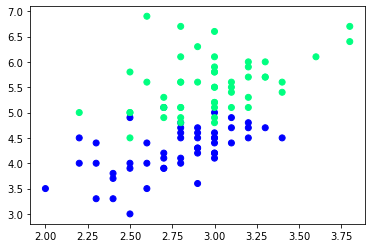

In [8]:
plt.scatter(df['sepal width (cm)'],df['petal length (cm)'],c=df['target'],cmap='winter')
plt.show()

In [9]:
# df.iloc[:,:-1]

In [10]:
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [11]:
X_test = df_val.iloc[:,:2].values
y_test = df_val.iloc[:,-1].values
y_test

array([2, 2, 2, 2, 2], dtype=int64)

# Case 1- Bagging

In [12]:
df_bag = df_train.sample(8,replace=True)
X = df_bag.iloc[:,:2]
y = df_bag.iloc[:,-1]

# Decision Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [14]:
dt_bag = DecisionTreeClassifier()


In [15]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values,y.values,clf=clf,legend=2)
    y_pred= clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

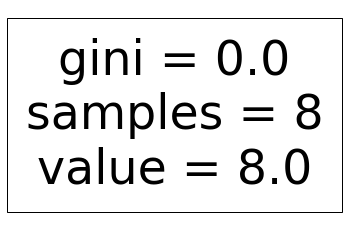

0.0


C:\Users\InFiNiTe\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\InFiNiTe\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:315: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)
C:\Users\InFiNiTe\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


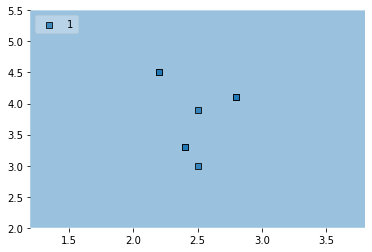

In [16]:
evaluate(dt_bag, X,y)

In [17]:
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal width (cm),petal length (cm),target
115,3.2,5.3,2
115,3.2,5.3,2
68,2.2,4.5,1
99,2.8,4.1,1
69,2.5,3.9,1
69,2.5,3.9,1
99,2.8,4.1,1
115,3.2,5.3,2


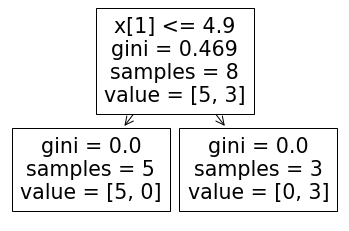

0.8


C:\Users\InFiNiTe\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\InFiNiTe\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


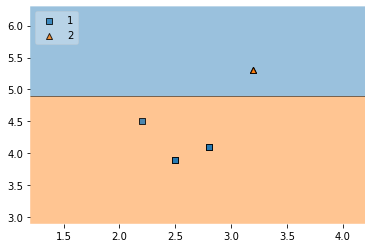

In [18]:
dt_bag2= DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

# Predict

In [19]:
df_test

,sepal width (cm),petal length (cm),target
56,3.3,4.7,1
95,3.0,4.2,1
139,3.1,5.4,2
84,3.0,4.5,1
65,3.1,4.4,1


In [20]:
print("Predictor 1",dt_bag.predict(np.array([3.3,4.7]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([3.3,4.7]).reshape(1,2)))

Predictor 1 [1]
Predictor 2 [1]


C:\Users\InFiNiTe\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\InFiNiTe\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Pasting

In [21]:
# without replacement
df_train

,sepal width (cm),petal length (cm),target
77,3.0,5.0,1
57,2.4,3.3,1
68,2.2,4.5,1
99,2.8,4.1,1
109,3.6,6.1,2
69,2.5,3.9,1
120,3.2,5.7,2
115,3.2,5.3,2
98,2.5,3.0,1
63,2.9,4.7,1


In [23]:
df_train.sample(8)

,sepal width (cm),petal length (cm),target
109,3.6,6.1,2
77,3.0,5.0,1
99,2.8,4.1,1
57,2.4,3.3,1
115,3.2,5.3,2
120,3.2,5.7,2
68,2.2,4.5,1
98,2.5,3.0,1


## Random Subspaces

In [28]:
iris = load_iris()
X = iris.data
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['target'] = iris.target
df=df.sample(10)

In [29]:
df.sample(2,axis=1,replace=True)

,petal width (cm),sepal length (cm)
5,0.4,5.4
146,1.9,6.3
52,1.5,6.9
12,0.1,4.8
28,0.2,5.2
25,0.2,5.0
73,1.2,6.1
29,0.2,4.7
88,1.3,5.6
105,2.1,7.6


# Random Patches

In [30]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['target'] = iris.target

In [31]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df.sample(8,replace=True).sample(2,rep)